In [72]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotnine as p9
import mizani
plt.style.use('ggplot')

In [74]:
jhu_daily_data = "../data/daily.df"
jhu = pd.read_pickle(jhu_daily_data)

In [75]:
jhu.head()

,Active,Admin2,Combined_Key,Confirmed,Country/Region,Country_Region,Date,Deaths,FIPS,Last Update,Last_Update,Lat,Latitude,Long_,Longitude,Province/State,Province_State,Recovered
0,9.0,Abbeville,"Abbeville, South Carolina, US",9.0,NaN,US,2020-04-13,0.0,45001.0,NaN,2020-04-13 23:07:54,34.223334,NaN,-82.461707,NaN,NaN,South Carolina,0.0
1,96.0,Acadia,"Acadia, Louisiana, US",101.0,NaN,US,2020-04-13,5.0,22001.0,NaN,2020-04-13 23:07:54,30.295065,NaN,-92.414197,NaN,NaN,Louisiana,0.0
2,15.0,Accomack,"Accomack, Virginia, US",15.0,NaN,US,2020-04-13,0.0,51001.0,NaN,2020-04-13 23:07:54,37.767072,NaN,-75.632346,NaN,NaN,Virginia,0.0
3,511.0,Ada,"Ada, Idaho, US",517.0,NaN,US,2020-04-13,6.0,16001.0,NaN,2020-04-13 23:07:54,43.452658,NaN,-116.241552,NaN,NaN,Idaho,0.0
4,1.0,Adair,"Adair, Iowa, US",1.0,NaN,US,2020-04-13,0.0,19001.0,NaN,2020-04-13 23:07:54,41.330756,NaN,-94.471059,NaN,NaN,Iowa,0.0


In [76]:
jhu['Date'] = jhu['Date'].apply(lambda x: x.to_timestamp()) 

jhu['Last_Update'] = pd.to_datetime(jhu['Last_Update'])

jhu_totals = jhu.groupby('Date').sum().reset_index()

jhu_country = jhu.groupby(['Date','Country_Region']).sum().reset_index()

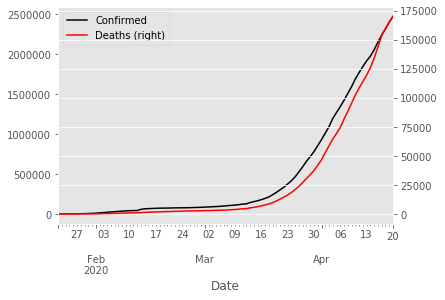

In [77]:
ax = jhu_totals.plot(x='Date',y='Confirmed',c='k')
_ = jhu_totals.plot(x='Date',y='Deaths',secondary_y=True,ax=ax,c='r')

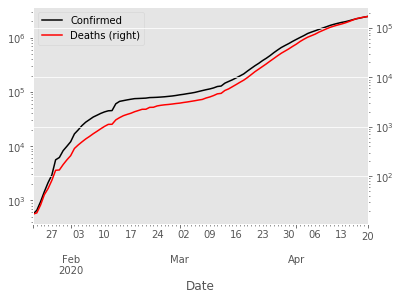

In [78]:
ax = jhu_totals.plot(x='Date',y='Confirmed',c='k',logy=True)
_ = jhu_totals.plot(x='Date',y='Deaths',secondary_y=True,ax=ax,c='r',logy=True)

/home/jsharpna/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


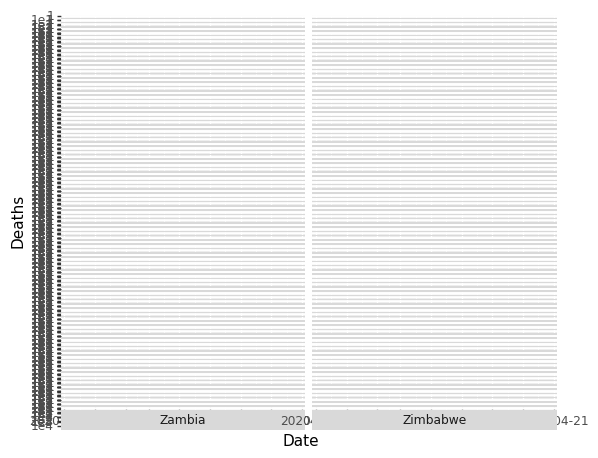

<ggplot: (8750008969969)>

In [80]:
p9.ggplot(jhu_country,p9.aes(x='Date',y='Deaths')) \
+ p9.scale_y_log10() \
+ p9.facet_wrap('~Country_Region', ncol=2)